<a href="https://colab.research.google.com/github/bezerraluis/BootCamp-Data-Science/blob/main/Churn_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Set

Dataset :[Kaggle](https://www.kaggle.com/shrutimechlearn/churn-modelling)




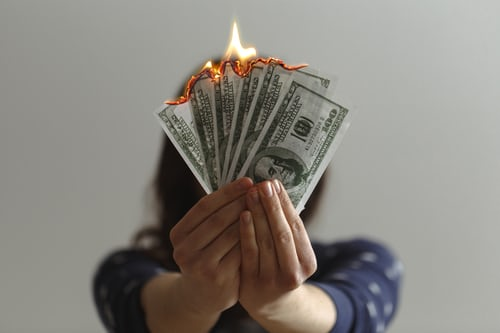

# Hypotheses 


h1 .Customers with lower scores tend to churn.

h2 .The country is decisive for the client to churn

h3 .There are more men than women who churn.

h4 .Younger customer has a tendency to churn.

h5 .Customers with up to 2 years as a customer usually churn.

h6 .Customers who do not have a credit card tend to churn.

# Business Problem 

Decreasing the number of churns is something that the entire company needs to pursue. It is essential for the growth and health of any operation.

How to project growth, attract investors if customer retention fails within organizations.

When a user churns, and this is repeated with other people, a very large alert signal needs to be turned on.

And a question must be answered: what are we doing wrong?

Customers talk to each other. Information is accessible to all. Therefore, working to have an ever lower churn, close to zero, is a tireless pursuit.

More than that. Understanding the (especially financial) impact of this metric is vital. It is what will maintain financial health and a safer hike for any business.

# Business Need

The Bank needs to understand why the churn rate is increasing and which actions

are recommended to reduce this number. They ask you to create a predictive

model that helps to explain the probability of a client to churn.

# Solution

A Model to predict client's churn probability.

A list with the 100 churn customers

API to set up the parameters and test solution



# Description

RowNumber - Row Numbers from 1 to 10000

CustomerId - Unique Ids for bank customer identification  

Surname - Customer's last name

CreditScore -  Credit score of the customer

Geography - The country from which the customer belongs

Gender -  Male or Female

Age - Age of the customer

Tenure - Number of years for which the customer has been with the bank

Balance - Bank balance of the customer

NumOfProducts - Number of bank products the customer is utilising

# Index:

1 Business Problem.

2 Library Imports

3.0 Exploratory Data Analysis
 
4.0 Feature Engeneering

5.0 Reescaling

6.0 Encoding

7.0 Balancing data

8.0 Feature Selection

9.0 Baseline

10.0 Cross Validation

11.0 Training balanced data

12.0 Hyperparameter fine tuning

13.0 Final Model

14.0 Business Problem

15.0 Next Steps


# 1.0 Librarie

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import Image, HTML

# Desabilitando warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:

def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:95% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )

    sns.set()


In [ ]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


# 2.0 Descriptive Data Analysis

##2.1 Viewing data 



In [ ]:
df_churn = pd.read_csv("/content/drive/MyDrive/Voltando as origens DS/Churn_Modelling.csv")

In [ ]:
df_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 2.2 Missing Values

**We do not have missing values**

In [ ]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## 2.3 Checking the classes 

**20 % of the customers closed the bank account **

In [ ]:
Exited = df_churn["Exited"].value_counts()

Exited

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
leave = (Exited[1]/len(df_churn["Exited"]))*100

print(leave,"%")

20.369999999999997 %


##2.4 Distribution and Data 

### 2.4.1 Row Number

In [ ]:
df_churn["RowNumber"].unique()

array([    1,     2,     3, ...,  9998,  9999, 10000])

As we can see RowNumber is just a line identifier so it has no predictive power and we will delete it

In [ ]:
df_churn2 = df_churn.drop("RowNumber",axis=1)

In [ ]:
df_churn2.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 2.4.2 CustomerID

In [ ]:
df_churn["CustomerId"].unique()

array([15634602, 15647311, 15619304, ..., 15584532, 15682355, 15628319])

The same goes to CustomerID

In [ ]:
df_churn2 = df_churn2.drop("CustomerId",axis=1)

df_churn2.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 2.4.3 Surname

In [ ]:
df_churn2["Surname"].unique()

array(['Hargrave', 'Hill', 'Onio', ..., 'Kashiwagi', 'Aldridge',
       'Burbidge'], dtype=object)

In [ ]:
df_churn2 = df_churn2.drop("Surname",axis=1)

df_churn2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 2.4.4 CreditScore  

We have a good distribution of the data. A standard 
deviation of 96 and 75 percent of the data is between 584 and 718

In [ ]:
df_churn2["CreditScore"].describe( )

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

Here we can better visualize our distribution and our quartiles

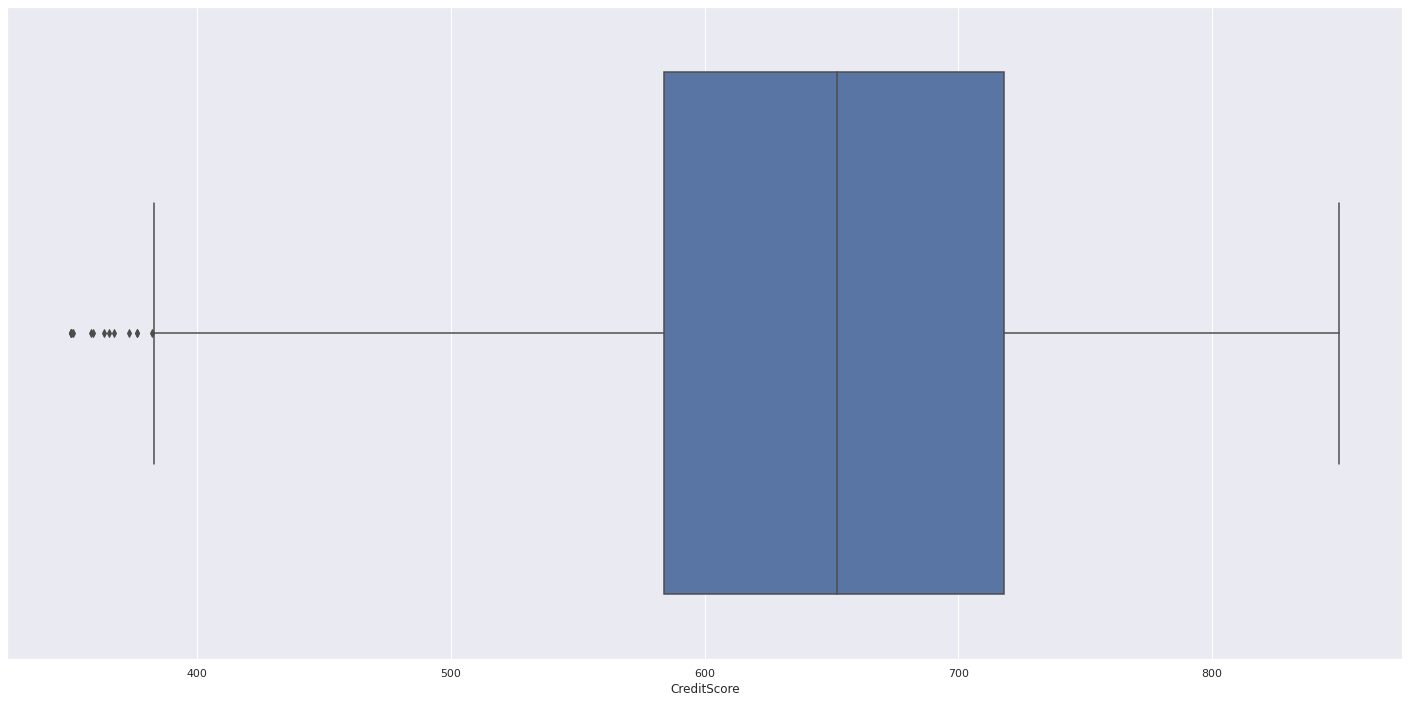

In [ ]:
sns.boxplot(df_churn2["CreditScore"])

We have a distribution very close to a normal curve.

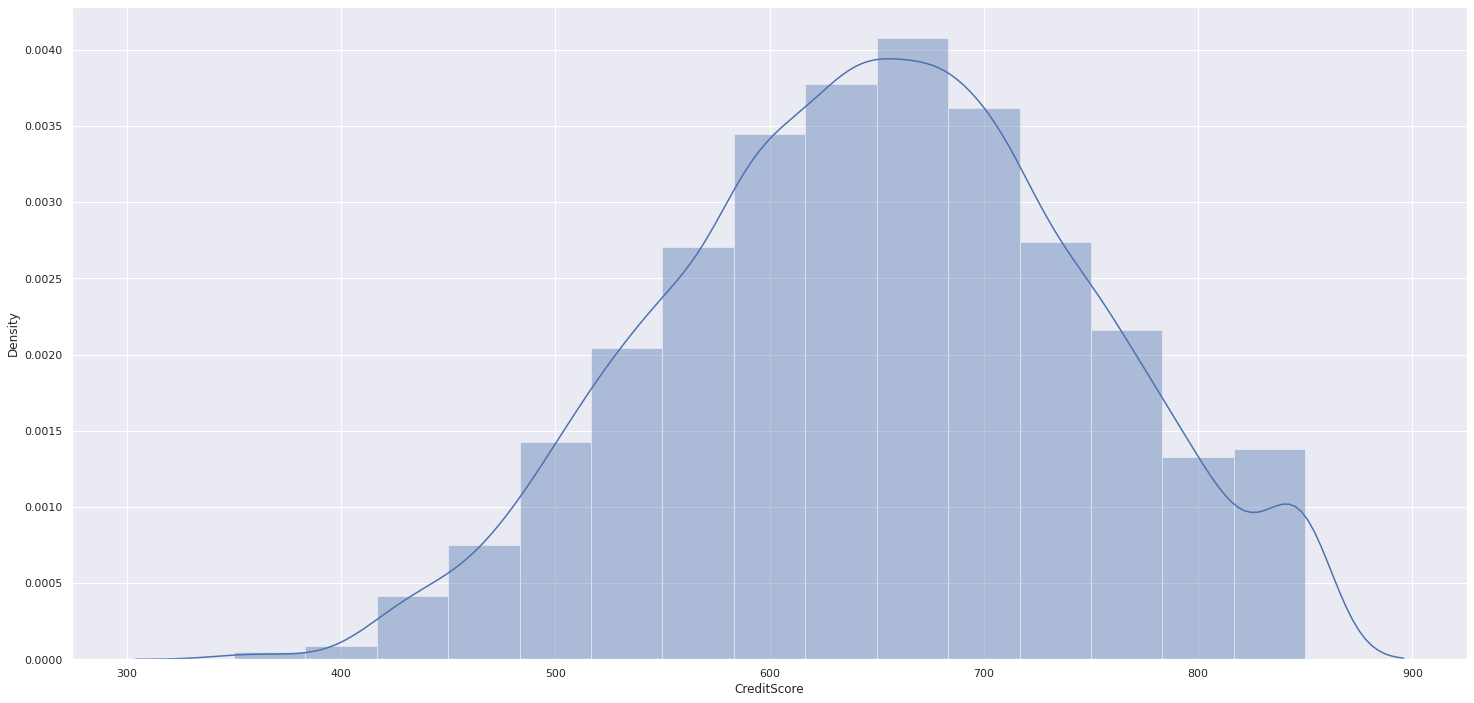

In [ ]:
sns.distplot(df_churn2['CreditScore'], bins= 15)

### 2.4.5 Geography

We do not have misspelled words

In [ ]:
df_churn2["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

### 2.4.6 Gender 

We do not have misspelled words

In [ ]:
df_churn2["Gender"].unique()

array(['Female', 'Male'], dtype=object)

### 2.4.7 Age 

In [ ]:
df_churn2['Age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83])

We have a good distribution of the data. A standard deviation of 10 and 75 percent of the data is between 32 and 44


In [ ]:
df_churn2['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

We can see that we have data from 60 years old, which can be outliers in our distribution.

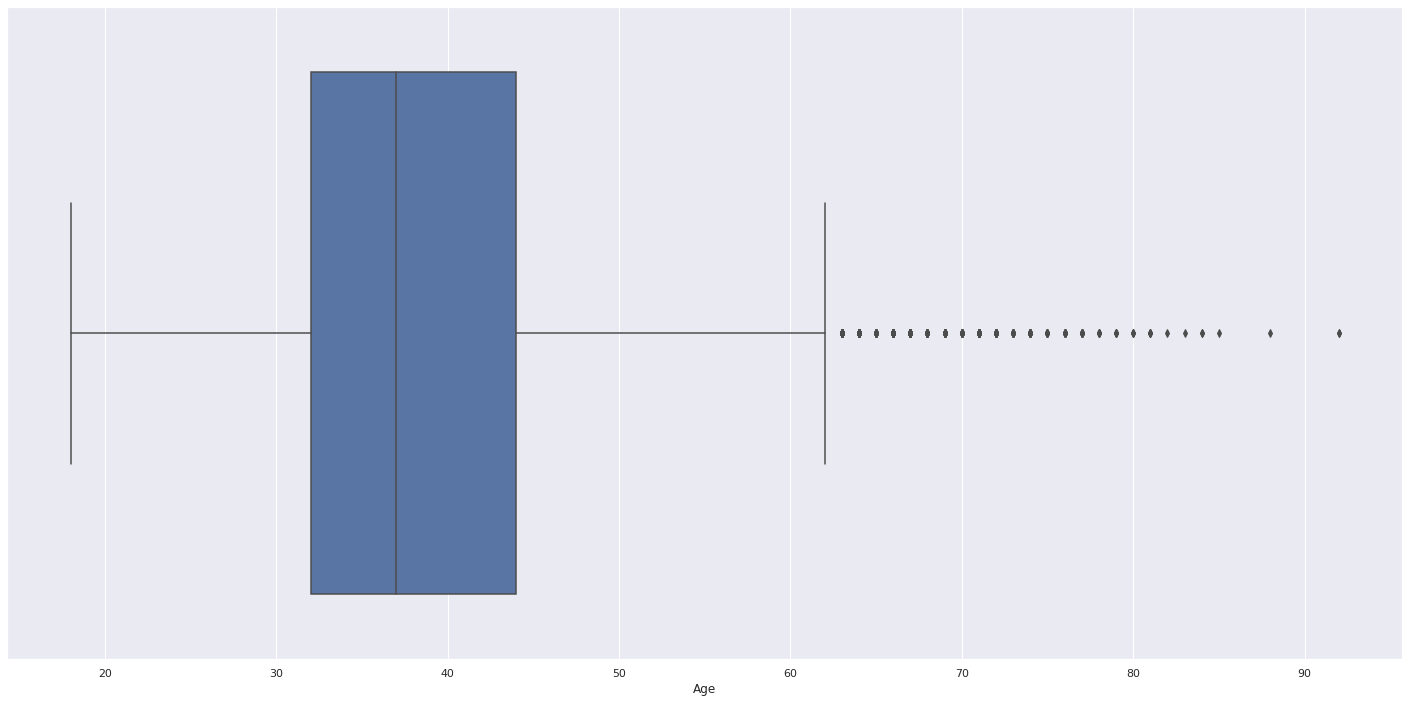

In [ ]:
sns.boxplot(df_churn2["Age"]);

We can see that our distribution is approaching a normal distribution and that data from 60 is pulling the tail to the right

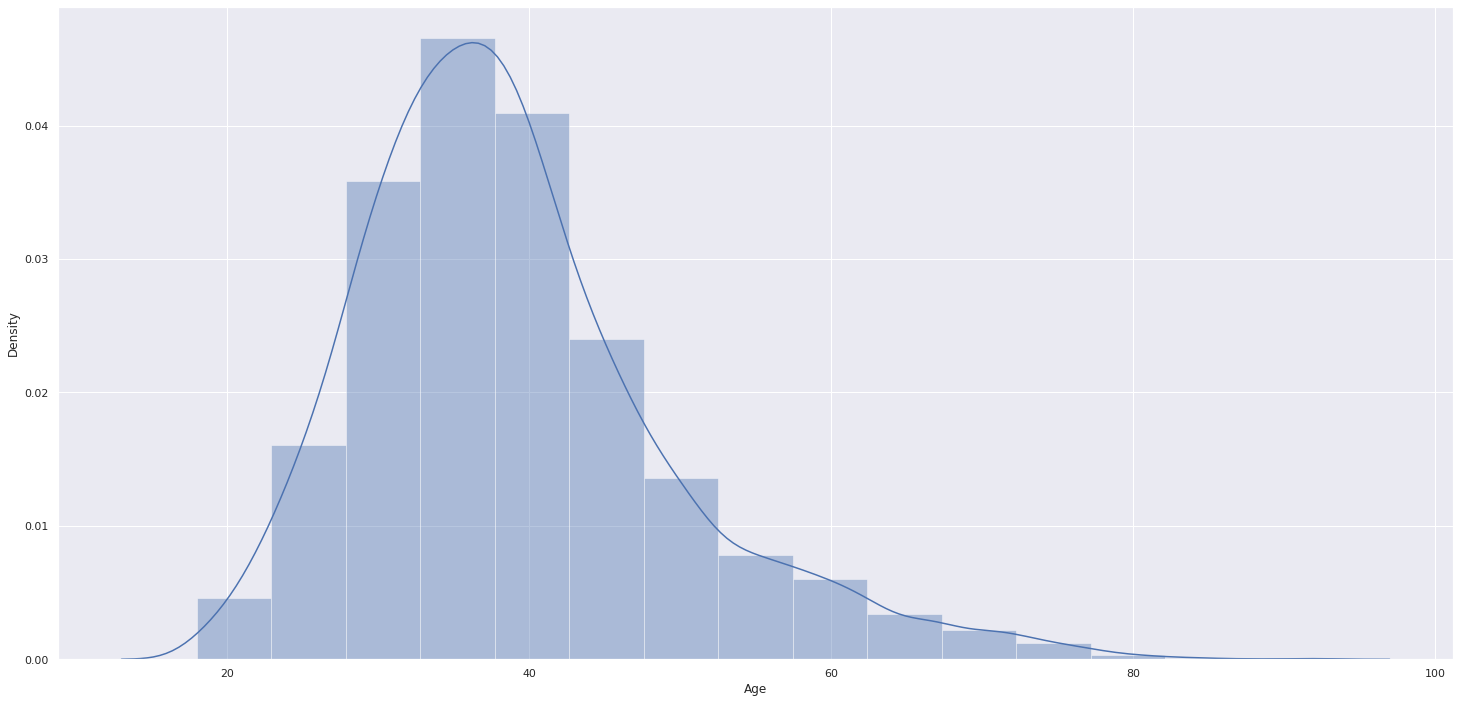

In [ ]:
sns.distplot(df_churn2['Age'], bins= 15)

### 2.4.8 Tenure 

In [ ]:
df_churn2['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

We do not have a problem with our data the standard deviation is low ,our data is distributed between 0 to 10 and the quartiles are ok.

In [ ]:
df_churn2['Tenure'].describe()

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64

We do not have outliers

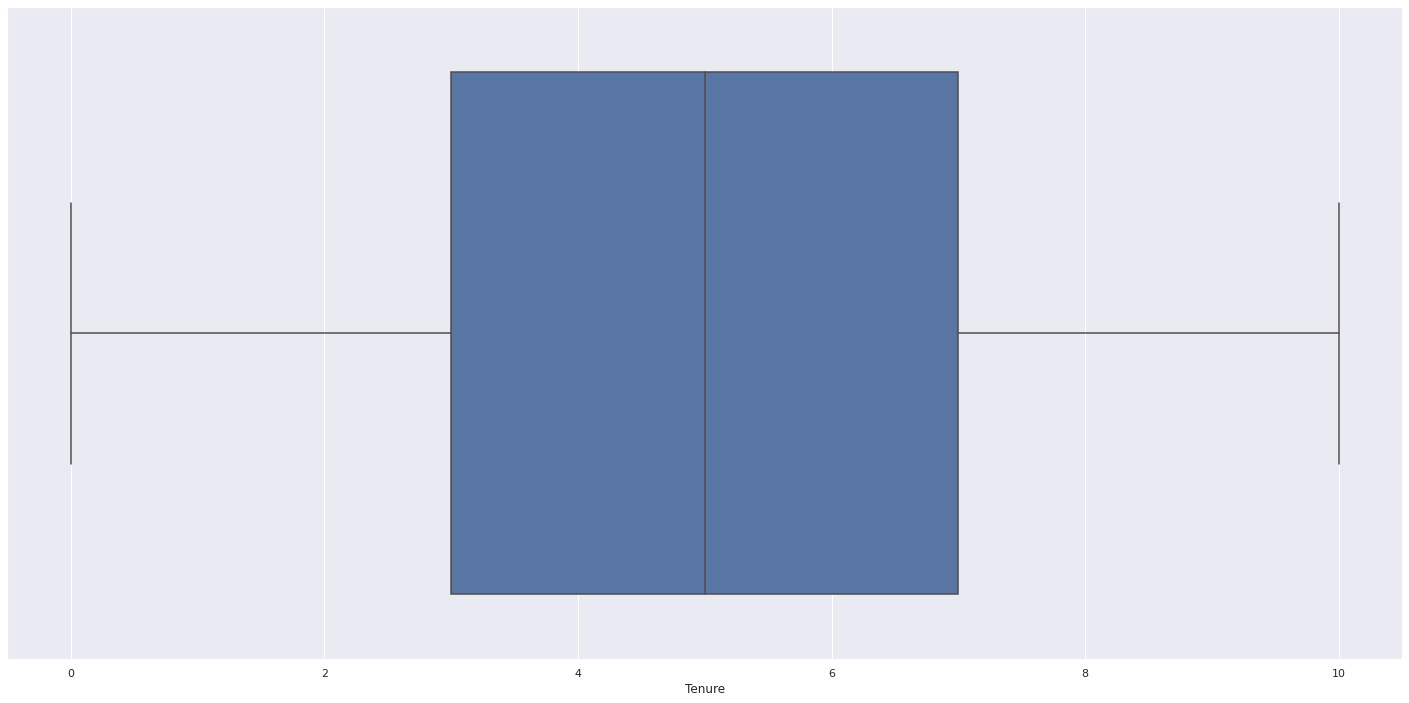

In [ ]:
sns.boxplot(df_churn2['Tenure']);

We do not have a normal distribution.

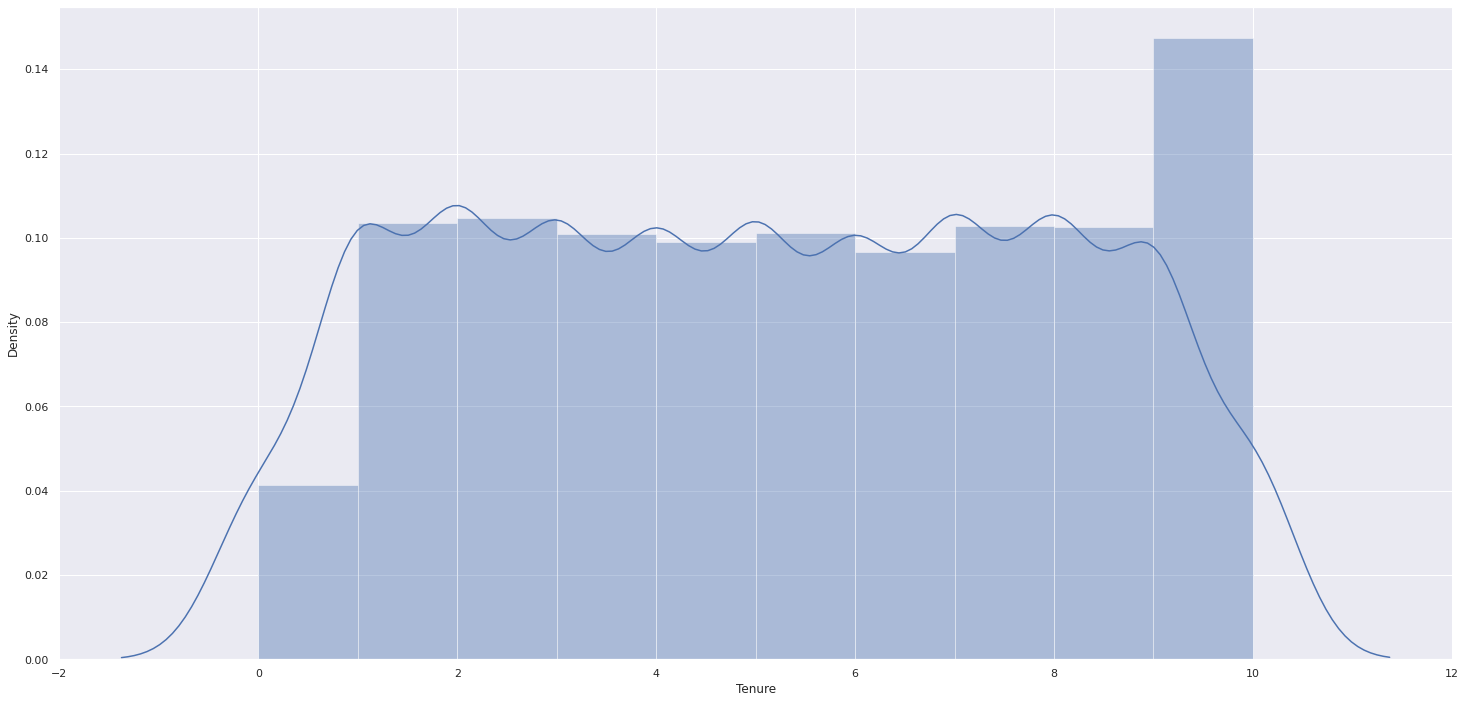

In [ ]:
sns.distplot(df_churn2['Tenure'],bins=10);

### 2.4.9 Balance

In [ ]:
df_churn2["Balance"].unique()

array([     0.  ,  83807.86, 159660.8 , ...,  57369.61,  75075.31,
       130142.79])

We have customers with 0 on the account and 250898 max and most of the customers have between 0 to 127644


In [ ]:
df_churn2['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

We do not have outliers

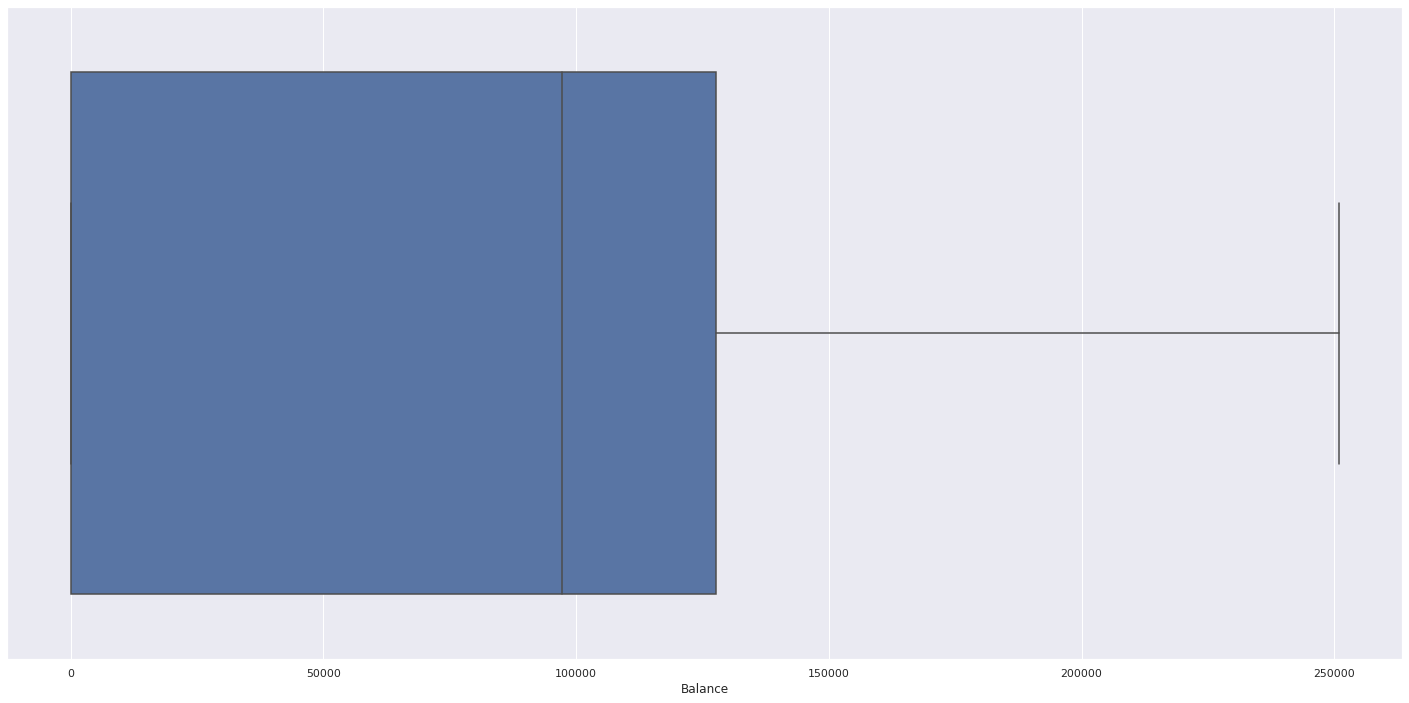

In [ ]:
sns.boxplot(df_churn2['Balance']);


We do not have a normal distribution , coustomers with 0 balance are skewing our data.

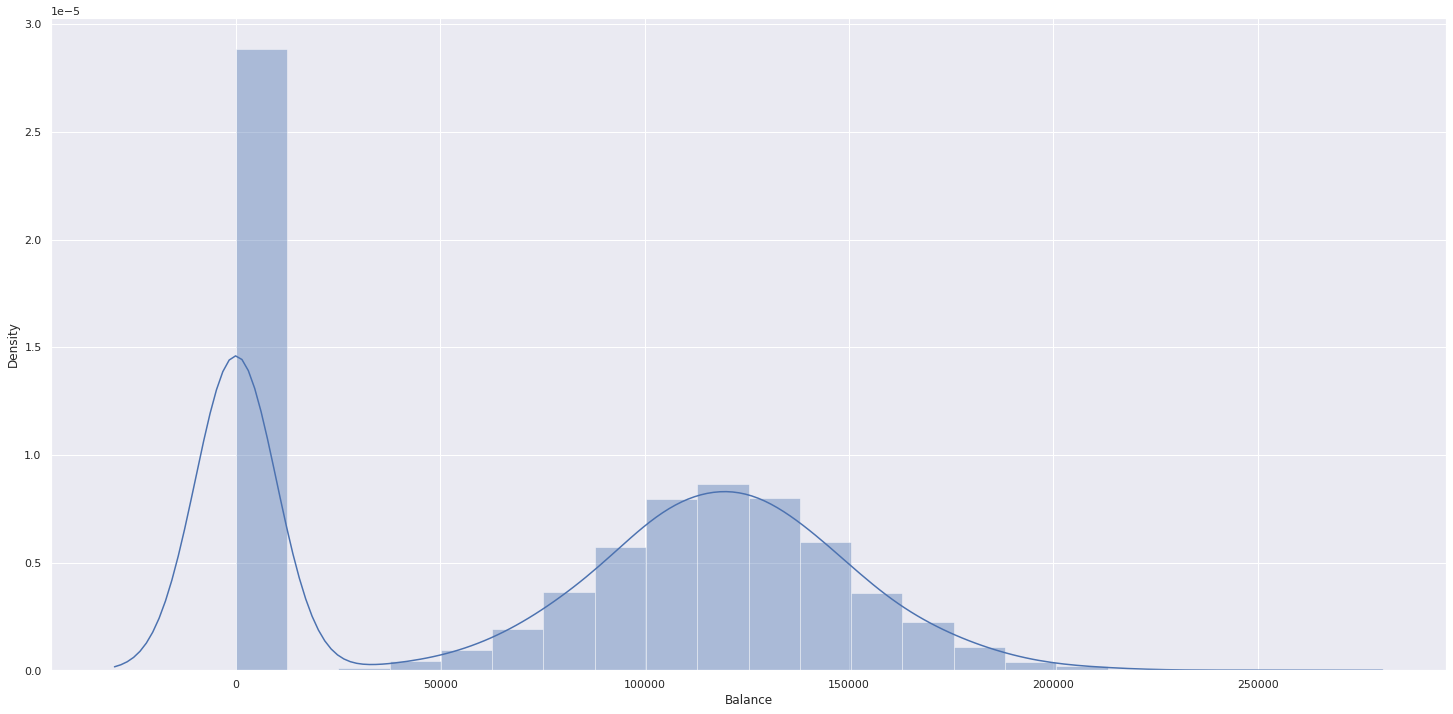

In [ ]:
sns.distplot(df_churn2['Balance'],bins=20);

# Nova seção

# Nova seção

# Nova seção

# Nova seção